# Import Library dan Datset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
#Impor Data Ritel Online yang berisi transaksi dari 12/01/2010 dan 12/09/2011
df = pd.read_excel('rfm_dataset.xlsx')
df.head()

,DATE,CUSTOMER,BR/BKJ,RASPBERRY,BLUEBERRY,FROZEN RASPBERRY,CAPE GOOSEBERRY,TEA,JAM,NO NOTA,PRICE '/GRS,TOTAL HARGA
0,2023-11-01,PT. Graha Alam Lestari Pastry po 132401,BR,2000.0,NaN,NaN,NaN,NaN,NaN,16914.0,440,880000
1,2023-11-01,PT. Graha Alam Lestari Pastry po 132401,BR,NaN,750.0,NaN,NaN,NaN,NaN,16914.0,550,412500
2,2023-11-01,PT. Graha Alam Lestari Koral po 132401,BR,500.0,NaN,NaN,NaN,NaN,NaN,16915.0,440,220000
3,2023-11-01,Melia Bali,BR,2000.0,NaN,NaN,NaN,NaN,NaN,16916.0,440,880000
4,2023-11-01,Folie,BR,500.0,NaN,NaN,NaN,NaN,NaN,16917.0,440,220000


# Cleaning Dataset

In [5]:
#Melakukan pengecekan shape (columns and rows) dari dataset
df.shape

(346, 12)

In [6]:
#Check missing value pada dataset
df.isnull().sum(axis=0)

DATE                  0
CUSTOMER              0
BR/BKJ                0
RASPBERRY            31
BLUEBERRY           344
FROZEN RASPBERRY    339
CAPE GOOSEBERRY     325
TEA                 345
JAM                 346
NO NOTA               9
PRICE '/GRS           0
TOTAL HARGA           0
dtype: int64

In [7]:
df['RASPBERRY'].fillna(0, inplace=True)
df['BLUEBERRY'].fillna(0, inplace=True)
df['FROZEN RASPBERRY'].fillna(0, inplace=True)
df['CAPE GOOSEBERRY'].fillna(0, inplace=True)
df['TEA'].fillna(0, inplace=True)
df['JAM'].fillna(0, inplace=True)

In [8]:
df.isnull().sum(axis=0)

DATE                0
CUSTOMER            0
BR/BKJ              0
RASPBERRY           0
BLUEBERRY           0
FROZEN RASPBERRY    0
CAPE GOOSEBERRY     0
TEA                 0
JAM                 0
NO NOTA             9
PRICE '/GRS         0
TOTAL HARGA         0
dtype: int64

In [9]:
df = df.dropna(subset=['NO NOTA'])

In [10]:
df.shape

(337, 12)

In [11]:
df.isnull().sum(axis=0)

DATE                0
CUSTOMER            0
BR/BKJ              0
RASPBERRY           0
BLUEBERRY           0
FROZEN RASPBERRY    0
CAPE GOOSEBERRY     0
TEA                 0
JAM                 0
NO NOTA             0
PRICE '/GRS         0
TOTAL HARGA         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 345
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              337 non-null    datetime64[ns]
 1   CUSTOMER          337 non-null    object        
 2   BR/BKJ            337 non-null    object        
 3   RASPBERRY         337 non-null    float64       
 4   BLUEBERRY         337 non-null    float64       
 5   FROZEN RASPBERRY  337 non-null    float64       
 6   CAPE GOOSEBERRY   337 non-null    float64       
 7   TEA               337 non-null    float64       
 8   JAM               337 non-null    float64       
 9   NO NOTA           337 non-null    float64       
 10  PRICE '/GRS       337 non-null    int64         
 11  TOTAL HARGA       337 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 34.2+ KB


# RFM Modelling

- Recency = Latest Date - Last Inovice Data
- Frequency = count of invoice no. of transaction(s)
- Monetary = Sum of Total 

In [13]:
import datetime as dt

In [14]:
df['DATE'].max()

Timestamp('2023-11-29 00:00:00')

In [15]:
#Menetapkan tgl terbaru 2023-11-30, hal ini untuk menghitung jumlah hari sejak tanggal invoice terakhir
Latest_Date = dt.datetime(2023,11,30)

In [16]:
#Membuat RFM Modelling scores untuk setiap customet
rfm_scores = df.groupby('CUSTOMER').agg({
    #Recency
    'DATE': lambda x: (Latest_Date - x.max()).days,

    #Frequency
    'NO NOTA': lambda x: len(x),

    #Monetary
    'TOTAL HARGA': lambda x: x.sum()
})

In [17]:
rfm_scores.head()

,DATE,NO NOTA,TOTAL HARGA
CUSTOMER,,,
Bintang Hayam Wuruk po 00233,24,2,509000
Bintang Hayam Wuruk po 01602,17,2,509000
Bintang Hayam Wuruk po 03293,10,1,425000
Bintang Hayam Wuruk po 05659,3,1,637500
Bintang Seminyak,3,3,1487500


In [18]:
#Convert data type dari InvoiceDate menjadi int
rfm_scores['DATE'] = rfm_scores['DATE'].astype(int)

In [19]:
#Rename column pada rfm_scores
rfm_scores.rename(columns={
    'DATE': 'Recency',
    'NO NOTA': 'Frequency',
    'TOTAL HARGA': 'Monetary'
}, inplace=True)

In [20]:
#Tampilkan dan reset index
rfm_scores.reset_index().head()

,CUSTOMER,Recency,Frequency,Monetary
0,Bintang Hayam Wuruk po 00233,24,2,509000
1,Bintang Hayam Wuruk po 01602,17,2,509000
2,Bintang Hayam Wuruk po 03293,10,1,425000
3,Bintang Hayam Wuruk po 05659,3,1,637500
4,Bintang Seminyak,3,3,1487500


In [21]:
rfm_scores.shape

(202, 3)

In [22]:
#Split menjadi empat segmen menggunakan kuartil
split = rfm_scores.quantile(q=[0.25,0.5,0.75])
split = split.to_dict()

In [23]:
split

{'Recency': {0.25: 5.0, 0.5: 13.0, 0.75: 22.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 425000.0, 0.5: 440000.0, 0.75: 831875.0}}

In [24]:
#Fungsi untuk membuat R, F and M segments

#Recency
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#Frequency  
def FScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Monetary 
def MScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [25]:
#Hitung & Tambahkan kolom nilai segmen R, F dan M di kumpulan data yang ada untuk menampilkan nilai segmen R, F dan M
rfm_scores['R'] = rfm_scores['Recency'].apply(RScoring, args=('Recency',split,))
rfm_scores['F'] = rfm_scores['Frequency'].apply(FScoring, args=('Frequency',split,))
rfm_scores['M'] = rfm_scores['Monetary'].apply(MScoring, args=('Monetary',split,))
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M
CUSTOMER,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2
Bintang Seminyak,3,3,1487500,1,1,1


In [26]:
#Hitung dan tambahkan pada column baru RFMGroup untuk melihat kombinasi dari rfm score
rfm_scores['RFMGroup'] = rfm_scores.R.map(str) + rfm_scores.F.map(str) + rfm_scores.M.map(str)

In [27]:
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CUSTOMER,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142
Bintang Seminyak,3,3,1487500,1,1,1,111


In [28]:
#Hitung dan tambahkan pada column baru RFMScore untuk menampilkan total sum dari RFMGroup values
rfm_scores['RFMScore'] = rfm_scores[['R', 'F', 'M']].sum(axis=1)
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CUSTOMER,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7
Bintang Seminyak,3,3,1487500,1,1,1,111,3


In [29]:
#Menetapkan Loyalty Level untuk masing-masing customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_scores.RFMScore, q = 4, labels = Loyalty_Level)
rfm_scores['RFM_Loyalty_Level'] = Score_cuts.values
rfm_scores.reset_index().head()

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Gold
1,Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Platinum
2,Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Silver
3,Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Platinum
4,Bintang Seminyak,3,3,1487500,1,1,1,111,3,Platinum


In [35]:
#Validate the data for RFMGroup = 111
platinum=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Platinum'].sort_values('Monetary', ascending=False).reset_index().head(30)

,CUSTOMER,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,Melia Bali,1,13,11440000,1,1,1,111,3,Platinum
1,COD - Alive,1,6,5510000,1,1,1,111,3,Platinum
2,COD - Butterman,1,10,4180000,1,1,1,111,3,Platinum
3,Canggu Station,1,5,2709375,1,1,1,111,3,Platinum
4,Pepito Peliatan,5,4,2443750,1,1,1,111,3,Platinum
5,Pepito SWJ,1,5,2443750,1,1,1,111,3,Platinum
6,COD - Usha,3,6,2310000,1,1,1,111,3,Platinum
7,Delta,5,4,2178125,1,1,1,111,3,Platinum
8,Pepito Andong,5,4,2125000,1,1,1,111,3,Platinum
9,Popular Deli,1,5,2125000,1,1,1,111,3,Platinum


In [65]:
platinum.to_csv("platinum.csv")

NameError: name 'platinum' is not defined

In [59]:
#Validate the data for RFMGroup = 222
gold=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Gold'].sort_values('Monetary', ascending=False).reset_index().head(30)

In [60]:
#Validate the data for RFMGroup = 333
silver=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Silver'].sort_values('Monetary', ascending=False).reset_index().head(30)

In [61]:
#Validate the data for RFMGroup = 444
bronze=rfm_scores[rfm_scores['RFM_Loyalty_Level']=='Bronze'].sort_values('Monetary', ascending=False).reset_index().head(30)

In [64]:
with pd.ExcelWriter('rfm_output.xlsx') as writer:
    platinum.to_excel(writer, sheet_name='Platinum', index=False)
    gold.to_excel(writer, sheet_name='Gold', index=False)
    silver.to_excel(writer, sheet_name='Silver', index=False)
    bronze.to_excel(writer, sheet_name='Bronze', index=False)


IndexError: At least one sheet must be visible

In [57]:
with pd.ExcelWriter('output.xlsx') as writer:
    # Membuat DataFrame baru untuk setiap kategori
    for category in rfm_scores['RFM_Loyalty_Level'].unique():
        category_data = rfm_scores[rfm_scores['RFM_Loyalty_Level'] == category]
        # Menyimpan DataFrame ke sheet yang sesuai dengan kategorinya
        category_data.to_excel(writer, sheet_name=category, index=False)

In [66]:
rfm_scores.shape

(202, 11)

In [67]:
with pd.ExcelWriter('rfm_output.xlsx') as writer:
    # Membuat DataFrame baru untuk setiap kategori
    for category in rfm_scores['RFM_Loyalty_Level'].unique():
        category_data = rfm_scores[rfm_scores['RFM_Loyalty_Level'] == category]
        # Menyimpan DataFrame ke sheet yang sesuai dengan kategorinya
        category_data.to_excel(writer, sheet_name=category)

# K-Means Clustering

In [42]:
#Menangani nilai negatif dan nol untuk menangani infinite numbers selama transformasi logaritma

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [43]:
#Menerapkan fungsi handle_neg_n_zero untuk kolom Recency dan Monetary 

rfm_scores['Recency'] = [handle_neg_n_zero(x) for x in rfm_scores.Recency]
rfm_scores['Monetary'] = [handle_neg_n_zero(x) for x in rfm_scores.Monetary]

In [44]:
#Lakukan transformasi Log untuk membawa data ke distribusi normal atau mendekati normal
Log_Tfd_Data = rfm_scores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

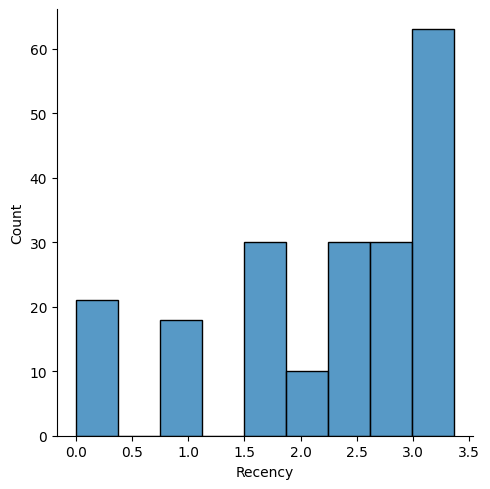

In [45]:
# Data distribution setelah data normalization untuk Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.displot(Recency_Plot)

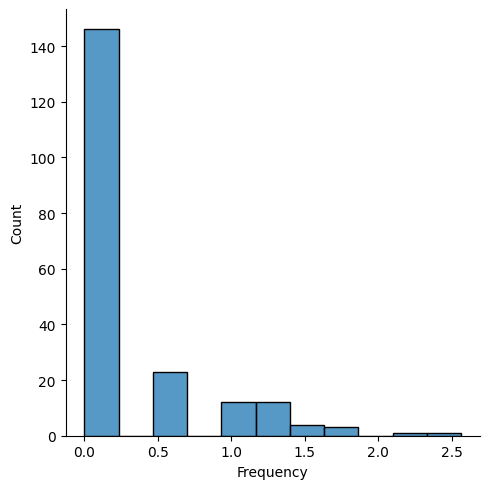

In [46]:
#Data distribution setelah data normalization untuk Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.displot(Frequency_Plot)

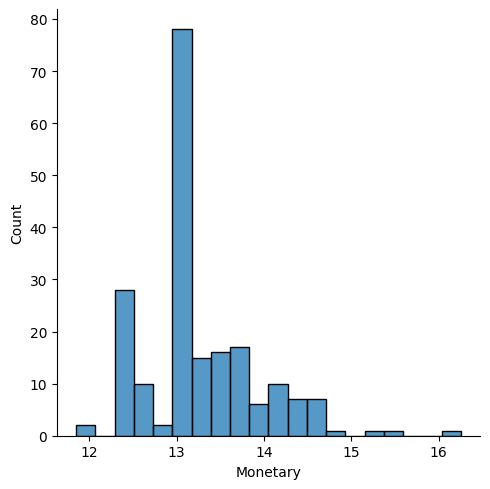

In [47]:
#Data distribution setelah data normalization untuk Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.displot(Monetary_Plot)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# Menyeseuaikan data sehingga berada pada skala yang sama
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

In [50]:
# Mengubah Scaled Data kembali menjadi Data Frame
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_scores.index, columns = Log_Tfd_Data.columns)

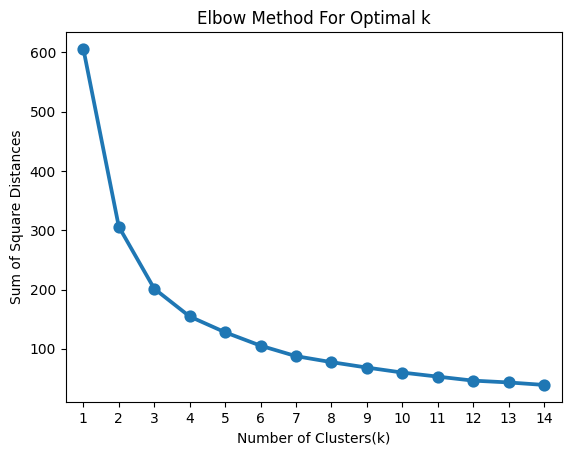

In [51]:
# Menentukan jumlah optimal dari cluster dalam algoritma KMeans dengan menggunakan Elbow Method
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, n_init=10)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
#Lakukan K-Mean Clustering atau buat model clustering K-Means
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000, n_init=10)
KMean_clust.fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=4, n_init=10)

In [53]:
#Temukan cluster untuk observasi yang diberikan dalam dataset
rfm_scores['Cluster'] = KMean_clust.labels_
rfm_scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CUSTOMER,,,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Gold,3
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Platinum,3
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Silver,0
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Platinum,2
Bintang Seminyak,3,3,1487500,1,1,1,111,3,Platinum,1


<Figure size 700x700 with 0 Axes>

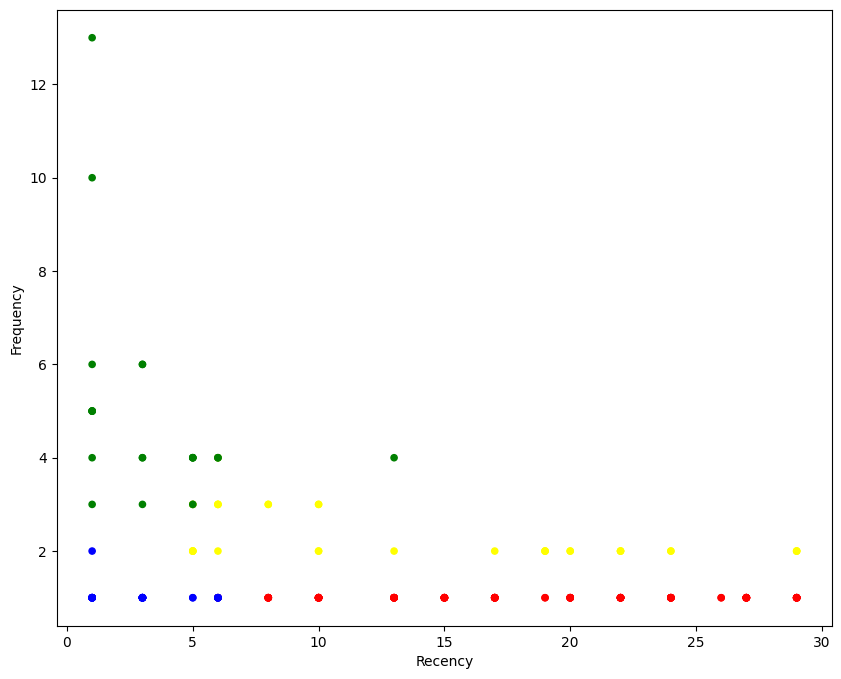

In [54]:
# Visualisasi hubungan antara Recency dan Frequency
from matplotlib import pyplot as plt

# Membuat gambar dengan ukuran 7 x 7
plt.figure(figsize=(7,7))

# Mendefinisikan warna yang akan digunakan untuk mewarnai titik-titik dalam scater plot
Colors = ["red", "green", "blue", "yellow"]
# Menambahkan kolom Color ke Data Frame
rfm_scores['Color'] = rfm_scores['Cluster'].map(lambda p: Colors[p])
ax = rfm_scores.plot(    
    kind="scatter", 
    # Recency pada sumbu x dan frequency pada sumbu y
    x="Recency", y="Frequency",
    # Menentukan ukuran scatter plot
    figsize=(10,8),
    c = rfm_scores['Color']
)

In [55]:
rfm_scores.head(20)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CUSTOMER,,,,,,,,,,,
Bintang Hayam Wuruk po 00233,24,2,509000,4,2,2,422,8,Gold,3,yellow
Bintang Hayam Wuruk po 01602,17,2,509000,3,2,2,322,7,Platinum,3,yellow
Bintang Hayam Wuruk po 03293,10,1,425000,2,4,4,244,10,Silver,0,red
Bintang Hayam Wuruk po 05659,3,1,637500,1,4,2,142,7,Platinum,2,blue
Bintang Seminyak,3,3,1487500,1,1,1,111,3,Platinum,1,green
Bintang Ubud,5,3,1806250,1,1,1,111,3,Platinum,1,green
Bintang Ubud @100gr,26,1,280000,4,4,4,444,12,Bronze,0,red
Bintang Ubud po 01071,19,2,917500,3,2,1,321,6,Platinum,3,yellow
Bulgary po 178882,29,1,440000,4,4,3,443,11,Silver,0,red


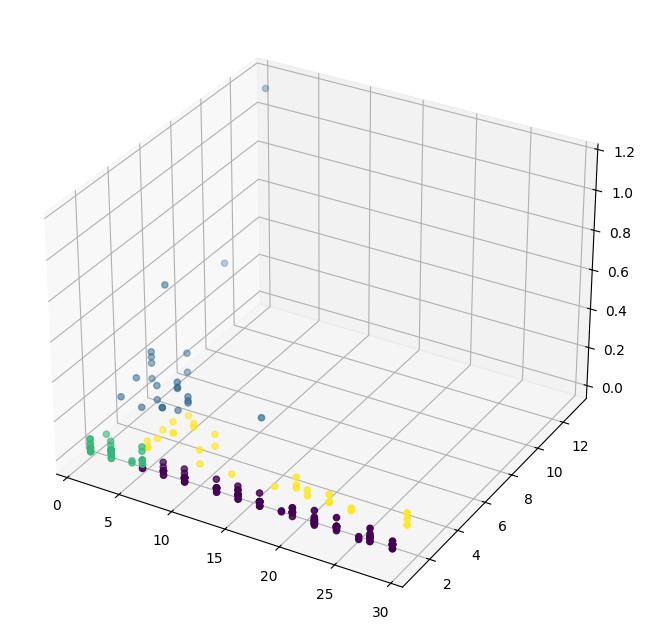

In [56]:
# Membuat plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot 3D
scatter = ax.scatter3D(rfm_scores['Recency'], rfm_scores['Frequency'], rfm_scores['Monetary'], c=rfm_scores['Cluster'])

# Menampilkan plot
plt.show()